#### импортируем библиотеки необходимые для работы с датасетом

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 1. Загрузим датасет и отобразим превью данных

In [3]:
df = pd.read_csv('2015-street-tree-census-tree-data.csv')

In [4]:
df.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

##### датасет содержит информацию о деревьях Нью-Йорка

# 2. Визуализируем объем пропущенных значений в данных

In [5]:
total_missing = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

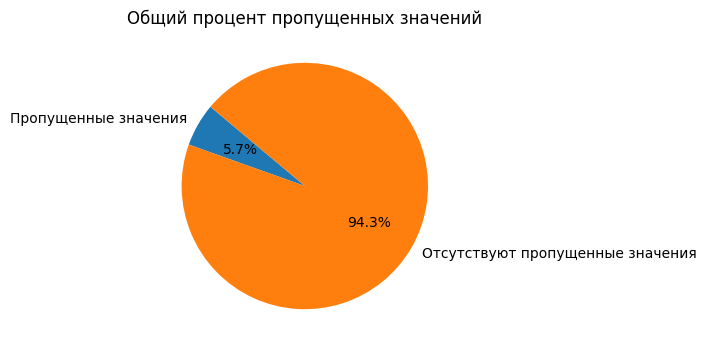

In [6]:
plt.figure(figsize=(6, 4))
plt.pie([total_missing, 100-total_missing], labels=['Пропущенные значения', 'Отсутствуют пропущенные значения'], autopct='%1.1f%%', startangle=140)
plt.title('Общий процент пропущенных значений')
plt.show()

#### количество пропущенных значений в датасете 5.7%

#### посмотрим количество пропущенных значений по столбцам

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [8]:
missing_percentage = missing_percentage[missing_percentage > 0]

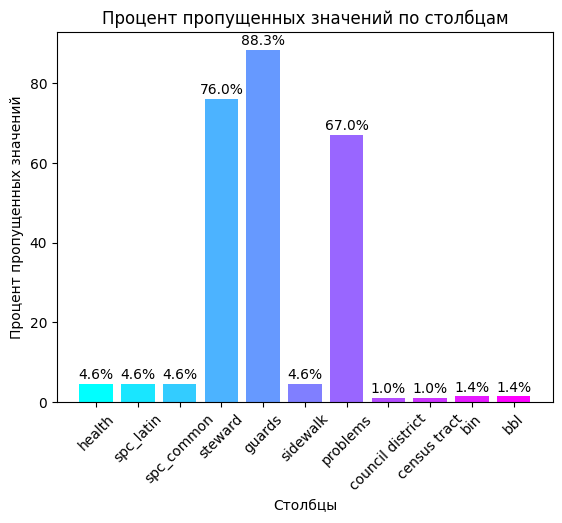

In [9]:
bars = plt.bar(missing_percentage.index, missing_percentage, color=plt.cm.cool(np.linspace(0, 1, len(missing_percentage))))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Процент пропущенных значений по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Процент пропущенных значений')
plt.xticks(rotation=45)
plt.show()

#### как мы видим, наибольшее количество пропущенных значений в столбцах steward, guards, problems.

In [10]:
df['steward'].unique()

array([nan, '1or2', '3or4', '4orMore'], dtype=object)

In [11]:
df['guards'].unique()

array([nan, 'Helpful', 'Harmful', 'Unsure'], dtype=object)

In [12]:
df['problems'].unique()

array([nan, 'Stones', 'MetalGrates', 'RootOther', 'Stones,BranchOther',
       'TrunkLights,BranchLights', 'RootOther,TrunkOther,BranchOther',
       'BranchOther', 'Stones,BranchLights', 'TrunkOther,BranchLights',
       'MetalGrates,TrunkOther', 'TrunkOther', 'Stones,WiresRope',
       'BranchLights', 'WiresRope,BranchOther', 'RootOther,BranchOther',
       'Stones,WiresRope,BranchLights', 'WiresRope',
       'WiresRope,BranchLights', 'Stones,TrunkOther',
       'WiresRope,TrunkLights,BranchLights', 'Stones,RootOther',
       'Stones,BranchLights,BranchOther', 'Stones,RootOther,BranchLights',
       'MetalGrates,BranchOther', 'Stones,RootOther,TrunkOther',
       'RootOther,TrunkOther',
       'Stones,TrunkOther,BranchLights,BranchOther',
       'Stones,TrunkOther,BranchOther', 'RootOther,BranchLights',
       'TrunkOther,BranchOther', 'RootOther,WiresRope,BranchLights',
       'Stones,TrunkOther,BranchLights', 'BranchLights,Sneakers',
       'Stones,RootOther,TrunkOther,BranchLights

# 3. Построим диаграмму попарного распределения признаков

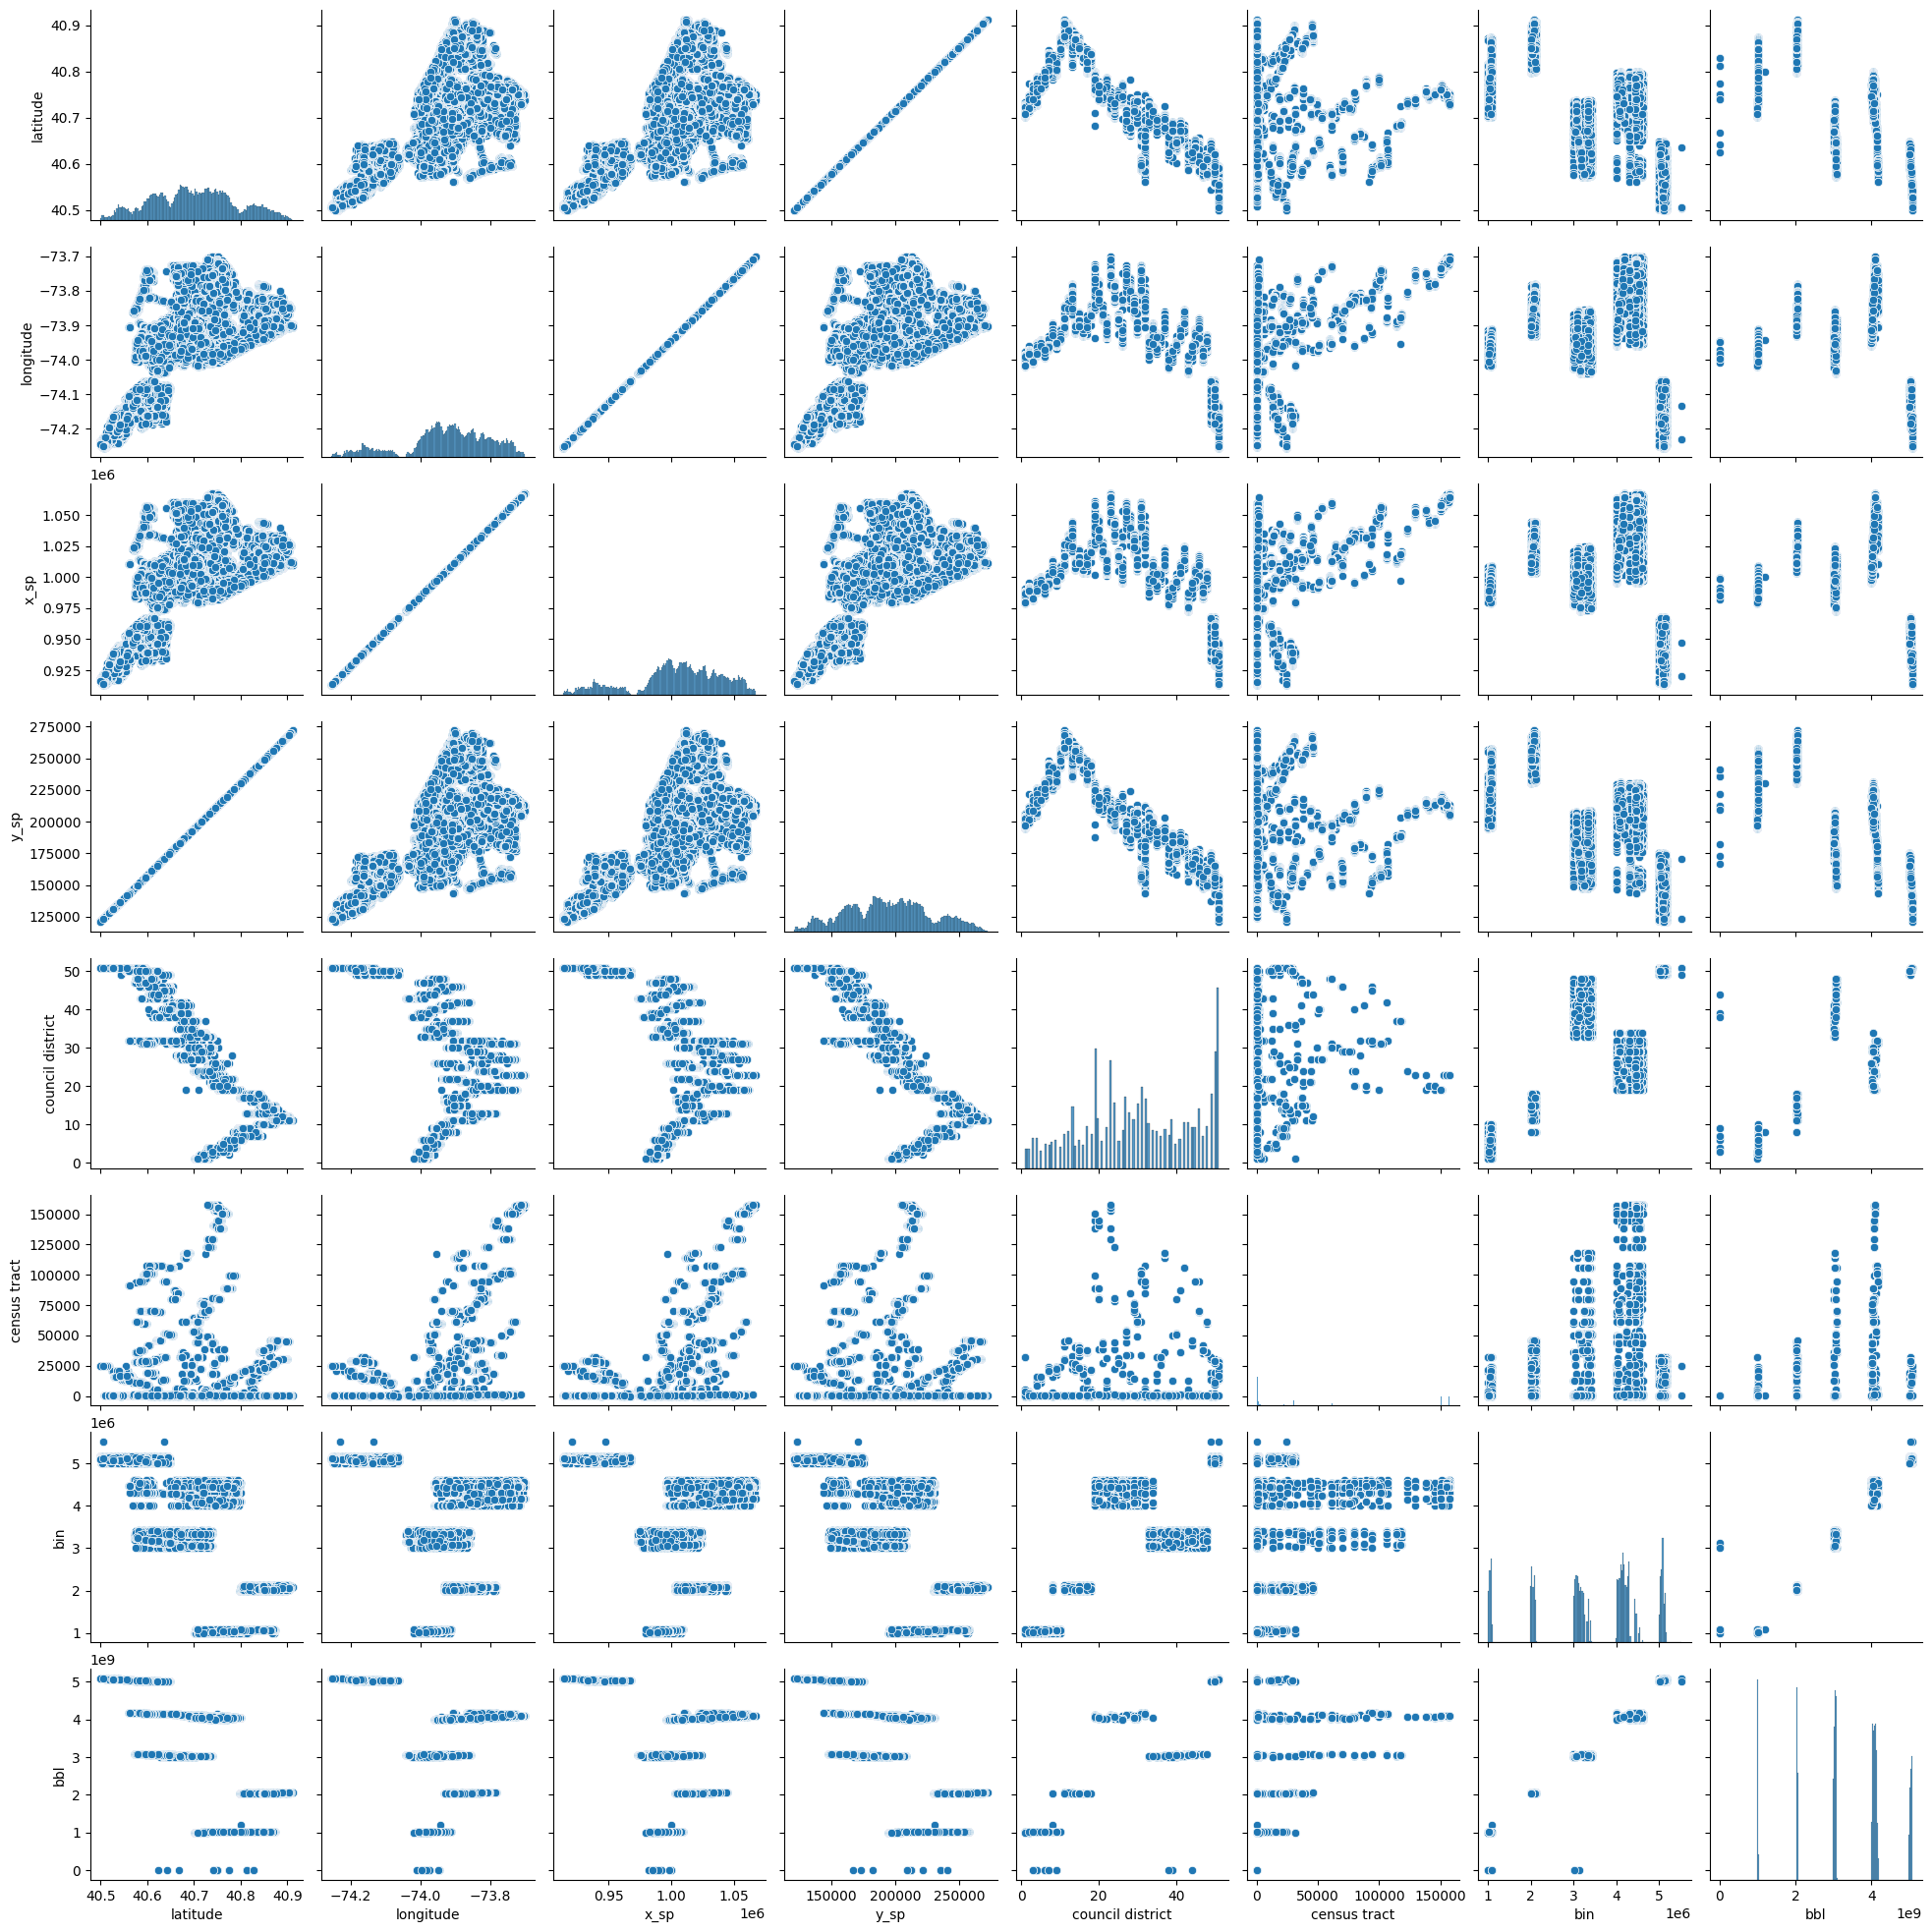

In [13]:
numeric_cols = df.select_dtypes(include=['float64']).columns

sns.pairplot(df[numeric_cols])

plt.show()

# 4. Матрица корреляций

In [14]:
correlation_matrix = df[numeric_cols].corr()

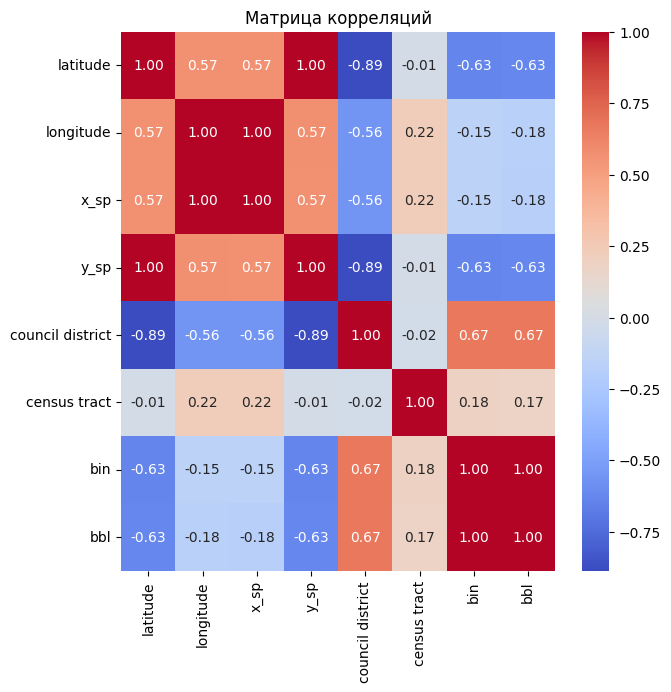

In [15]:
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# 5. Отобразим географическое представление деревьев из датасета

In [16]:
map_center_ny = [40.7128, -74.0060]

In [17]:
mymap = folium.Map(location=map_center_ny, zoom_start=10)

In [18]:
clean_df = df.dropna()

In [19]:
sample_df = clean_df.sample(n=100, random_state=42)

for index, row in sample_df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['tree_id']).add_to(mymap)

In [20]:
def add_marker(row):
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['tree_dbh']).add_to(mymap)

In [21]:
sample_df.apply(add_marker, axis=1)

57873     None
11644     None
274959    None
534436    None
97091     None
          ... 
644109    None
563836    None
566279    None
588407    None
584440    None
Length: 100, dtype: object

In [22]:
mymap